Link Dataset: https://www.kaggle.com/datasets/saurabhbadole/zomato-delivery-operations-analytics-dataset

# Problem Statement

1. **Apa saja faktor utama yang mempengaruhi tingkat kepuasan pelanggan dan hubungannya dengan churn?**
2. **Bagaimana distribusi Customer Lifetime Value (CLTV) berbeda antara pelanggan yang churn dan yang tidak?**
3. **Apakah ada pola tertentu dalam churn score yang dapat memprediksi kemungkinan pelanggan untuk churn?**
4. **Apa saja alasan utama pelanggan melakukan churn dan bagaimana kita dapat mengkategorikannya?**
5. **Bagaimana karakteristik pelanggan berbeda berdasarkan status mereka (Churned, Stayed, Joined)?**
6. **Apakah ada korelasi yang signifikan antara satisfaction score, CLTV, dan churn behavior?**


# Import Libraries dan Load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hassanelfattmi/why-do-customers-leave-can-you-spot-the-churners")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'why-do-customers-leave-can-you-spot-the-churners' dataset.
Path to dataset files: /kaggle/input/why-do-customers-leave-can-you-spot-the-churners


In [ ]:
df = pd.read_csv(os.path.join(path, 'Status_Analysis.csv'))
df.head()

,customer_id,satisfaction_score,cltv,customer_status,churn_score,churn_label,churn_value,churn_category,churn_reason
0,0002-ORFBO,3,2205,Stayed,65,No,0,Not Applicable,NaN
1,0003-MKNFE,5,5414,Stayed,66,No,0,Not Applicable,NaN
2,0004-TLHLJ,1,4479,Churned,71,Yes,1,Competitor,Competitor had better devices
3,0011-IGKFF,1,3714,Churned,91,Yes,1,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,1,3464,Churned,68,Yes,1,Dissatisfaction,Network reliability


# Data Understanding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         7043 non-null   object
 1   satisfaction_score  7043 non-null   int64 
 2   cltv                7043 non-null   int64 
 3   customer_status     7043 non-null   object
 4   churn_score         7043 non-null   int64 
 5   churn_label         7043 non-null   object
 6   churn_value         7043 non-null   int64 
 7   churn_category      7043 non-null   object
 8   churn_reason        1869 non-null   object
dtypes: int64(4), object(5)
memory usage: 495.3+ KB


In [ ]:
print(f"Dataset shape: {df.shape}")
print(f"Total records: {df.shape[0]:,}")
print(f"Total features: {df.shape[1]}")

Dataset shape: (7043, 9)
Total records: 7,043
Total features: 9


## Catgorical Data Analysis

In [ ]:
print("satisfaction_score:")
print(f"  Data type: {df['satisfaction_score'].dtype}")
print(f"  Non-null count: {df['satisfaction_score'].count()}")
print(f"  Null count: {df['satisfaction_score'].isnull().sum()}")
print(f"  Unique values: {df['satisfaction_score'].nunique()}")
print(f"  Values: {df['satisfaction_score'].unique()[:20]}")

satisfaction_score:
  Data type: int64
  Non-null count: 7043
  Null count: 0
  Unique values: 5
  Values: [3 5 1 4 2]


In [ ]:
print("cltv:")
print(f"  Data type: {df['cltv'].dtype}")
print(f"  Non-null count: {df['cltv'].count()}")
print(f"  Null count: {df['cltv'].isnull().sum()}")
print(f"  Unique values: {df['cltv'].nunique()}")
print(f"  Values: {df['cltv'].unique()[:20]}")

cltv:
  Data type: int64
  Non-null count: 7043
  Null count: 0
  Unique values: 3438
  Values: [2205 5414 4479 3714 3464 5108 5011 4604 5525 5509 5435 6252 5536 5513
 5795 4865 3607 4432 2654 5437]


In [ ]:
print("customer_status:")
print(f"  Data type: {df['customer_status'].dtype}")
print(f"  Non-null count: {df['customer_status'].count()}")
print(f"  Null count: {df['customer_status'].isnull().sum()}")
print(f"  Unique values: {df['customer_status'].nunique()}")
print(f"  Values: {df['customer_status'].unique()[:20]}")

customer_status:
  Data type: object
  Non-null count: 7043
  Null count: 0
  Unique values: 3
  Values: ['Stayed' 'Churned' 'Joined']


In [ ]:
print("churn_score:")
print(f"  Data type: {df['churn_score'].dtype}")
print(f"  Non-null count: {df['churn_score'].count()}")
print(f"  Null count: {df['churn_score'].isnull().sum()}")
print(f"  Unique values: {df['churn_score'].nunique()}")
print(f"  Values: {df['churn_score'].unique()[:20]}")

churn_score:
  Data type: int64
  Non-null count: 7043
  Null count: 0
  Unique values: 81
  Values: [65 66 71 91 68 55 26 49 34 25 54 52 57 53 37 50 92 85 61 75]


In [ ]:
print("churn_label:")
print(f"  Data type: {df['churn_label'].dtype}")
print(f"  Non-null count: {df['churn_label'].count()}")
print(f"  Null count: {df['churn_label'].isnull().sum()}")
print(f"  Unique values: {df['churn_label'].nunique()}")
print(f"  Values: {df['churn_label'].unique()[:20]}")

churn_label:
  Data type: object
  Non-null count: 7043
  Null count: 0
  Unique values: 2
  Values: ['No' 'Yes']


In [ ]:
print("churn_value:")
print(f"  Data type: {df['churn_value'].dtype}")
print(f"  Non-null count: {df['churn_value'].count()}")
print(f"  Null count: {df['churn_value'].isnull().sum()}")
print(f"  Unique values: {df['churn_value'].nunique()}")
print(f"  Values: {df['churn_value'].unique()[:20]}")

churn_value:
  Data type: int64
  Non-null count: 7043
  Null count: 0
  Unique values: 2
  Values: [0 1]


In [ ]:
print("churn_category:")
print(f"  Data type: {df['churn_category'].dtype}")
print(f"  Non-null count: {df['churn_category'].count()}")
print(f"  Null count: {df['churn_category'].isnull().sum()}")
print(f"  Unique values: {df['churn_category'].nunique()}")
print(f"  Values: {df['churn_category'].unique()[:20]}")

churn_category:
  Data type: object
  Non-null count: 7043
  Null count: 0
  Unique values: 6
  Values: ['Not Applicable' 'Competitor' 'Dissatisfaction' 'Other' 'Price'
 'Attitude']


In [ ]:
print("churn_reason:")
print(f"  Data type: {df['churn_reason'].dtype}")
print(f"  Non-null count: {df['churn_reason'].count()}")
print(f"  Null count: {df['churn_reason'].isnull().sum()}")
print(f"  Unique values: {df['churn_reason'].nunique()}")
print(f"  Values: {df['churn_reason'].unique()[:20]}")

churn_reason:
  Data type: object
  Non-null count: 1869
  Null count: 5174
  Unique values: 20
  Values: [nan 'Competitor had better devices' 'Product dissatisfaction'
 'Network reliability' 'Limited range of services'
 'Competitor made better offer' "Don't know" 'Long distance charges'
 'Attitude of service provider' 'Attitude of support person'
 'Competitor offered higher download speeds'
 'Competitor offered more data' 'Lack of affordable download/upload speed'
 'Deceased' 'Moved' 'Service dissatisfaction' 'Price too high'
 'Lack of self-service on Website' 'Poor expertise of online support'
 'Extra data charges']


## NUMERICAL DATA ANALYSIS

In [ ]:
numerical_columns = df.select_dtypes(include=[np.number]).columns
df[numerical_columns].describe()

,satisfaction_score,cltv,churn_score,churn_value
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,3.244924,4400.295755,58.505040,0.265370
std,1.201657,1183.057152,21.170031,0.441561
min,1.000000,2003.000000,5.000000,0.000000
25%,3.000000,3469.000000,40.000000,0.000000
50%,3.000000,4527.000000,61.000000,0.000000
75%,4.000000,5380.500000,75.500000,1.000000
max,5.000000,6500.000000,96.000000,1.000000


# Data Preprocessing

## Data Cleaning

### Handle missing values

In [ ]:
# Cek missing values
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
missing_info = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percentage
})
print("Missing Values Analysis:")
missing_info[missing_info['Missing Count'] > 0].sort_values('Missing Percentage', ascending=False)

Missing Values Analysis:


,Missing Count,Missing Percentage
churn_reason,5174,73.463013


In [ ]:
df_clean = df.copy()

In [ ]:
# Check missing values by churn_label
print("Churn Reason Missing by Churn Label:")
df_clean.groupby('churn_label')['churn_reason'].apply(lambda x: x.isnull().sum())

Churn Reason Missing by Churn Label:


,churn_reason
churn_label,
No,5174
Yes,0


In [ ]:
df_clean['churn_reason'] = df_clean['churn_reason'].fillna('Unknown')

In [ ]:
print("Missing values after cleaning:")
df_clean.isnull().sum()

Missing values after cleaning:


,0
customer_id,0
satisfaction_score,0
cltv,0
customer_status,0
churn_score,0
churn_label,0
churn_value,0
churn_category,0
churn_reason,0


### handle duplikat

In [ ]:
duplicates = df_clean.duplicated().sum()
print(f"Jumlah duplikat: {duplicates}")

Jumlah duplikat: 0


### Transformasi Data

In [ ]:
df_feature = df_clean.copy()

In [ ]:
df_feature['satisfaction_level'] = pd.cut(df_feature['satisfaction_score'],
                                bins=[0, 2, 3, 4, 5],
                                labels=['Very Low', 'Low', 'Medium', 'High'])

df_feature['cltv_quartile'] = pd.qcut(df_feature['cltv'],
                             q=4,
                             labels=['Q1 (Low)', 'Q2 (Medium-Low)', 'Q3 (Medium-High)', 'Q4 (High)'])

df_feature['churn_risk_level'] = pd.cut(df_feature['churn_score'],
                               bins=[0, 30, 60, 80, 100],
                               labels=['Low Risk', 'Medium Risk', 'High Risk', 'Critical Risk'])

In [ ]:
print(f"Final dataset shape: {df_feature.shape}")

Final dataset shape: (7043, 12)


# Eksplorasi Data (EDA)

## Analisis Distribusi Data

Analisis distribusi variabel numerik

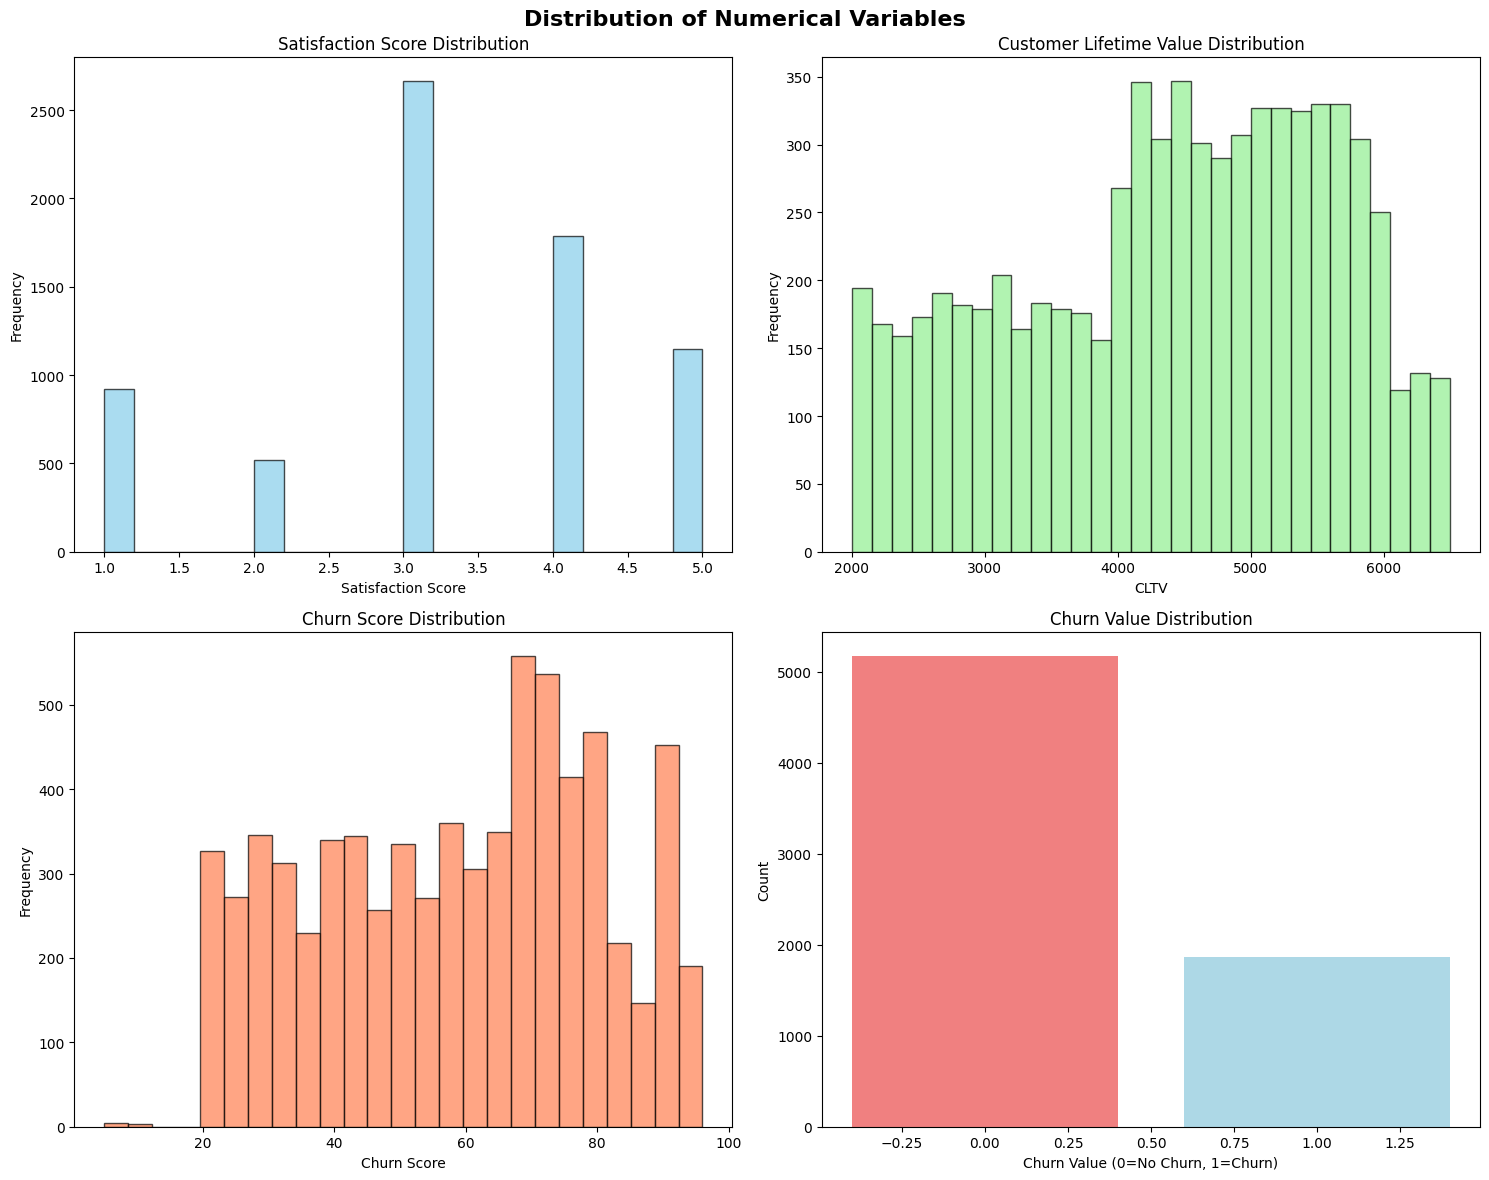

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Distribution of Numerical Variables', fontsize=16, fontweight='bold')

# Satisfaction Score
axes[0, 0].hist(df_feature['satisfaction_score'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Satisfaction Score Distribution')
axes[0, 0].set_xlabel('Satisfaction Score')
axes[0, 0].set_ylabel('Frequency')

# CLTV
axes[0, 1].hist(df_feature['cltv'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Customer Lifetime Value Distribution')
axes[0, 1].set_xlabel('CLTV')
axes[0, 1].set_ylabel('Frequency')

# Churn Score
axes[1, 0].hist(df_feature['churn_score'], bins=25, alpha=0.7, color='coral', edgecolor='black')
axes[1, 0].set_title('Churn Score Distribution')
axes[1, 0].set_xlabel('Churn Score')
axes[1, 0].set_ylabel('Frequency')

# Churn Value
axes[1, 1].bar(df_feature['churn_value'].value_counts().index,
               df_feature['churn_value'].value_counts().values,
               color=['lightcoral', 'lightblue'])
axes[1, 1].set_title('Churn Value Distribution')
axes[1, 1].set_xlabel('Churn Value (0=No Churn, 1=Churn)')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

Summary statistics

In [ ]:
churn_rate = df_feature['churn_value'].mean() * 100
print(f"Overall Churn Rate: {churn_rate:.2f}%")
print(f"Average Satisfaction Score: {df['satisfaction_score'].mean():.2f}")
print(f"Average CLTV: ${df['cltv'].mean():,.2f}")
print(f"Average Churn Score: {df['churn_score'].mean():.2f}")

Overall Churn Rate: 26.54%
Average Satisfaction Score: 3.24
Average CLTV: $4,400.30
Average Churn Score: 58.51


## Analisis Customer Status dan Churn Behavior

Analisis Customer Status

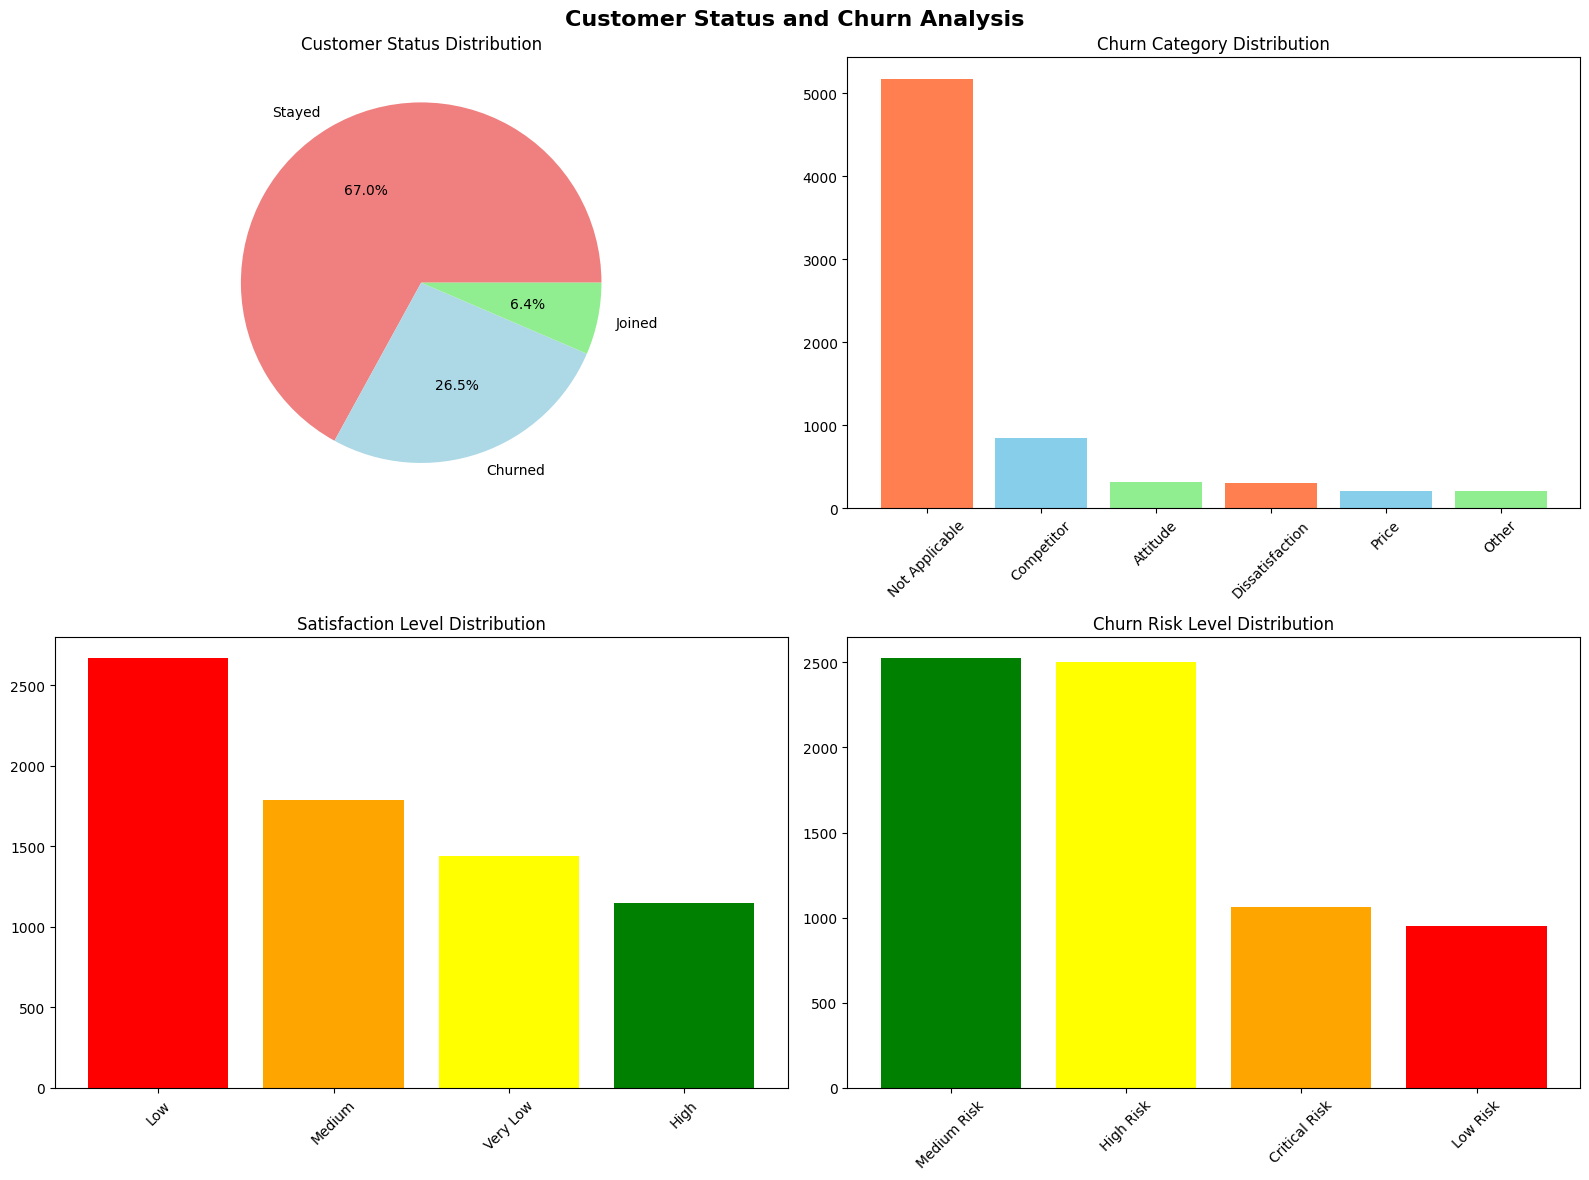

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Customer Status and Churn Analysis', fontsize=16, fontweight='bold')

# Customer Status Distribution
status_counts = df_feature['customer_status'].value_counts()
axes[0, 0].pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%',
               colors=['lightcoral', 'lightblue', 'lightgreen'])
axes[0, 0].set_title('Customer Status Distribution')

# Churn Category Distribution
churn_cat_counts = df_feature['churn_category'].value_counts()
axes[0, 1].bar(churn_cat_counts.index, churn_cat_counts.values,
               color=['coral', 'skyblue', 'lightgreen'])
axes[0, 1].set_title('Churn Category Distribution')
axes[0, 1].tick_params(axis='x', rotation=45)

# Satisfaction Level Distribution
sat_counts = df_feature['satisfaction_level'].value_counts()
axes[1, 0].bar(sat_counts.index, sat_counts.values,
               color=['red', 'orange', 'yellow', 'green'])
axes[1, 0].set_title('Satisfaction Level Distribution')
axes[1, 0].tick_params(axis='x', rotation=45)

# Churn Risk Level Distribution
risk_counts = df_feature['churn_risk_level'].value_counts()
axes[1, 1].bar(risk_counts.index, risk_counts.values,
               color=['green', 'yellow', 'orange', 'red'])
axes[1, 1].set_title('Churn Risk Level Distribution')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
for status in df_feature['customer_status'].unique():
    count = len(df_feature[df_feature['customer_status'] == status])
    percentage = (count / len(df_feature)) * 100
    print(f"{status}: {count:,} customers ({percentage:.1f}%)")

Stayed: 4,720 customers (67.0%)
Churned: 1,869 customers (26.5%)
Joined: 454 customers (6.4%)


## Analisis Churn Reasons

Analisis alasan churn (hanya untuk pelanggan yang churn)

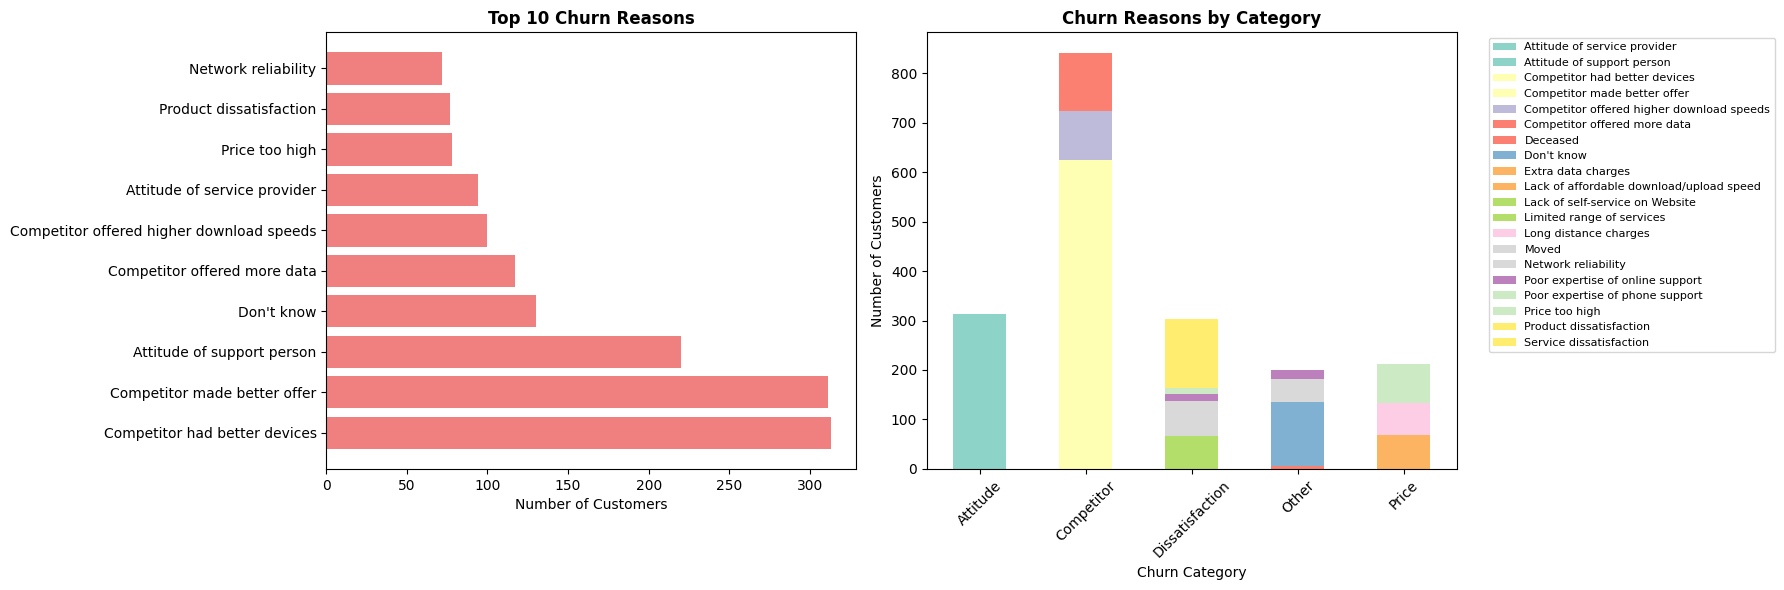

=== TOP CHURN REASONS ===


,count
churn_reason,
Competitor had better devices,313
Competitor made better offer,311
Attitude of support person,220
Don't know,130
Competitor offered more data,117


In [ ]:
churned_customers = df_feature[df_feature['churn_value'] == 1].copy()

if not churned_customers['churn_reason'].isnull().all():
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))

    # Top churn reasons
    churn_reasons = churned_customers['churn_reason'].value_counts().head(10)
    axes[0].barh(range(len(churn_reasons)), churn_reasons.values, color='lightcoral')
    axes[0].set_yticks(range(len(churn_reasons)))
    axes[0].set_yticklabels(churn_reasons.index, fontsize=10)
    axes[0].set_title('Top 10 Churn Reasons', fontweight='bold')
    axes[0].set_xlabel('Number of Customers')

    # Churn reasons by category
    churn_by_category = churned_customers.groupby(['churn_category', 'churn_reason']).size().unstack(fill_value=0)
    churn_by_category.plot(kind='bar', stacked=True, ax=axes[1], colormap='Set3')
    axes[1].set_title('Churn Reasons by Category', fontweight='bold')
    axes[1].set_xlabel('Churn Category')
    axes[1].set_ylabel('Number of Customers')
    axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

    print("=== TOP CHURN REASONS ===")
    display(churn_reasons.head())

## Analisis Korelasi dan Hubungan Antar Variabel

Correlation matrix untuk variabel numerik

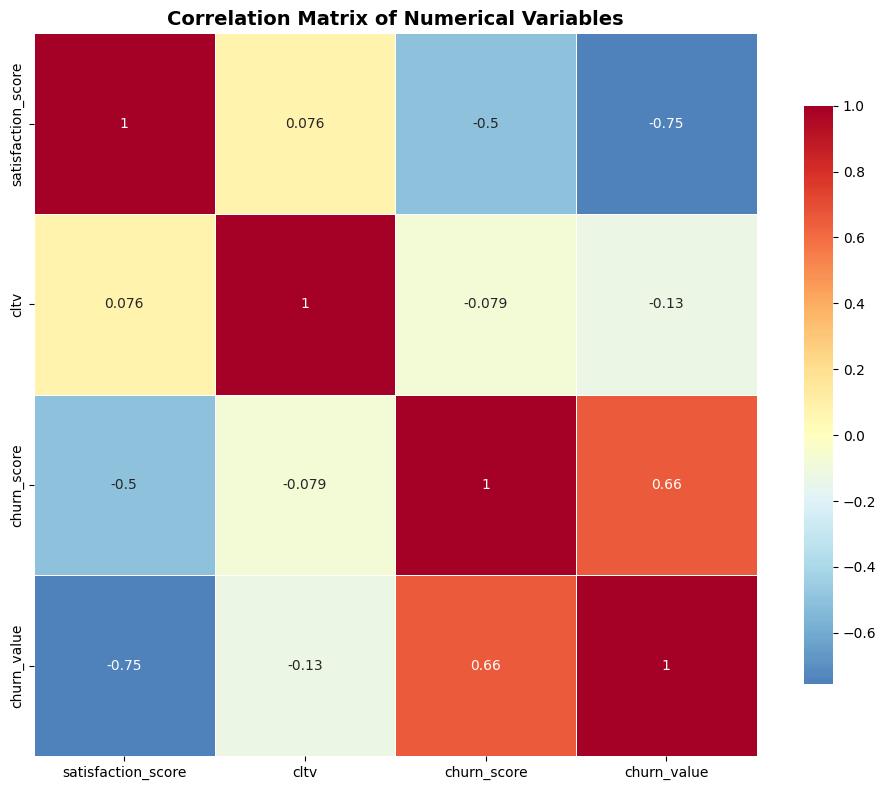

In [ ]:
# Define numerical columns
numerical_cols = ['satisfaction_score', 'cltv', 'churn_score', 'churn_value']

# Calculate correlation matrix
correlation_matrix = df_feature[numerical_cols].corr()

# Create heatmap without masking the diagonal
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
ax.set_title('Correlation Matrix of Numerical Variables', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
for i in range(len(correlation_matrix.columns)):
    for j in range(i, len(correlation_matrix.columns)):  # Start from i to include diagonal
        corr_val = correlation_matrix.iloc[i, j]
        if i == j:
            print(f"{correlation_matrix.columns[i]} - {correlation_matrix.columns[j]}: {corr_val:.3f} (perfect correlation, same variable)")
        elif abs(corr_val) > 0.5:
            print(f"{correlation_matrix.columns[i]} - {correlation_matrix.columns[j]}: {corr_val:.3f} (strong correlation)")

satisfaction_score - satisfaction_score: 1.000 (perfect correlation, same variable)
satisfaction_score - churn_value: -0.755 (strong correlation)
cltv - cltv: 1.000 (perfect correlation, same variable)
churn_score - churn_score: 1.000 (perfect correlation, same variable)
churn_score - churn_value: 0.661 (strong correlation)
churn_value - churn_value: 1.000 (perfect correlation, same variable)


## Analisis Komparatif: Churned vs Non-Churned

Perbandingan metrics antara churned dan non-churned customers

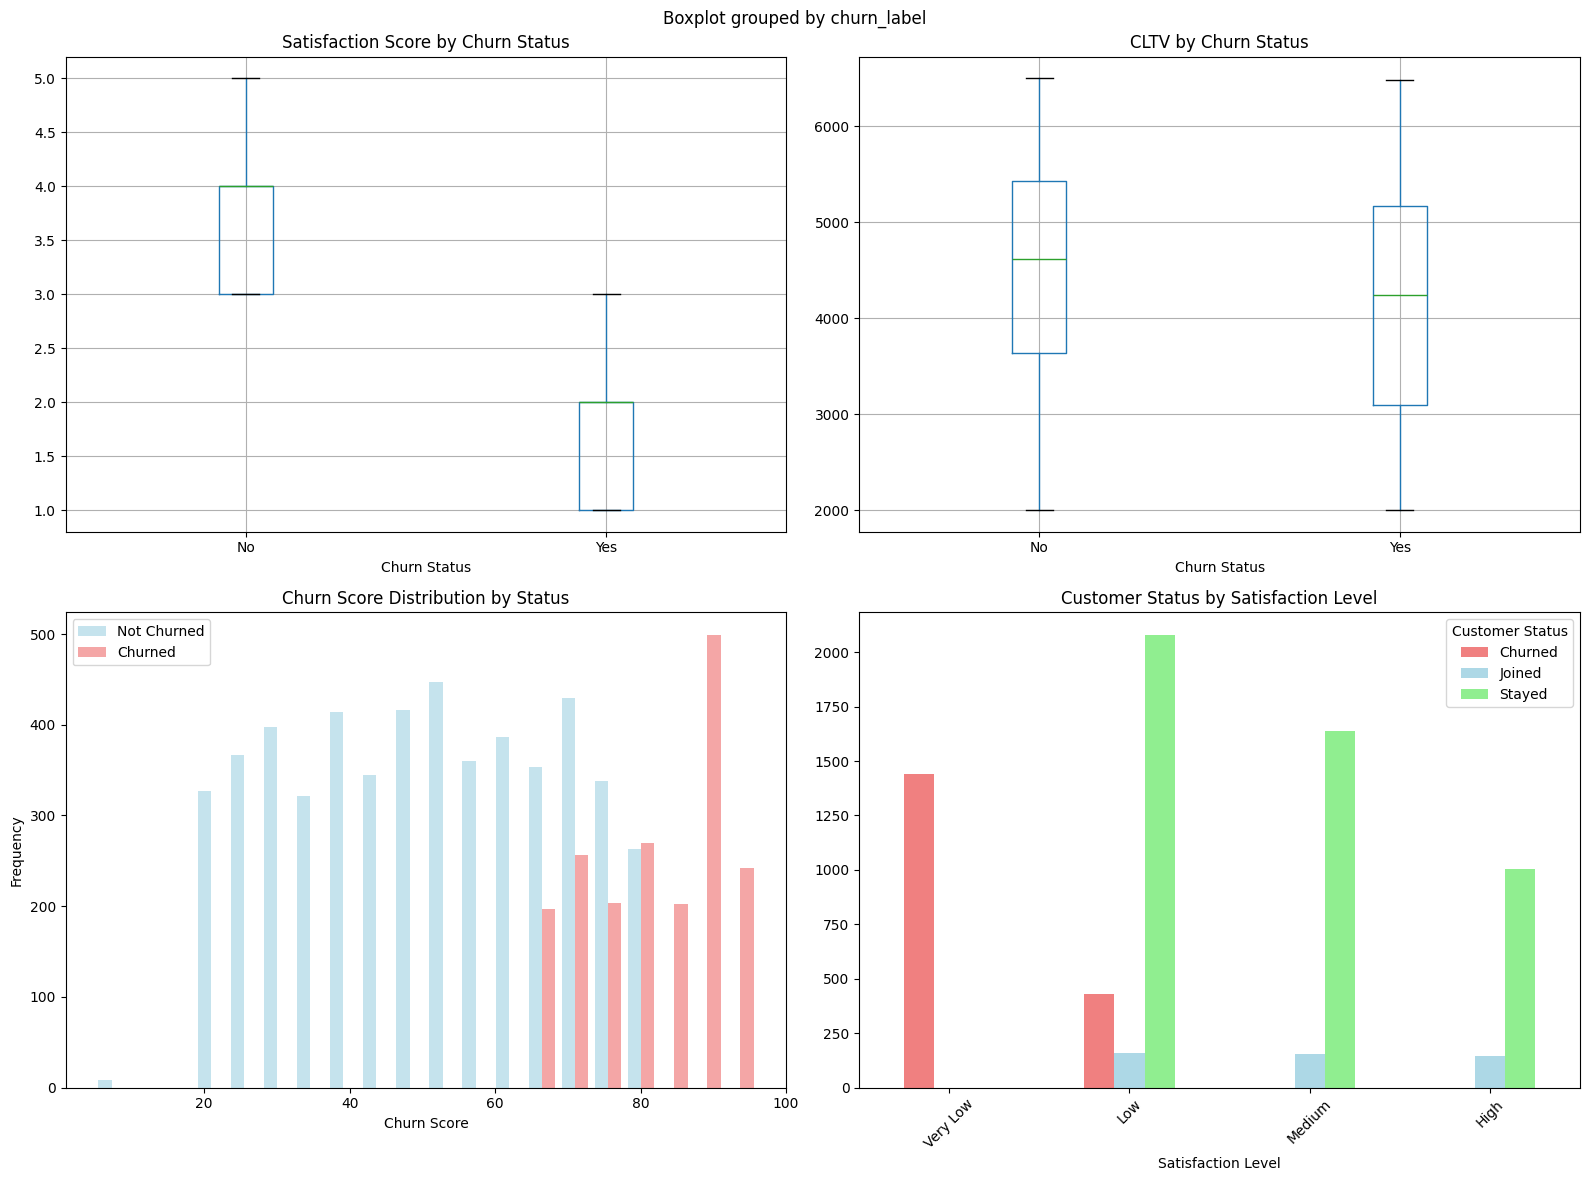

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Churned vs Non-Churned Customer Analysis', fontsize=16, fontweight='bold')


# Satisfaction Score comparison
df_feature.boxplot(column='satisfaction_score', by='churn_label', ax=axes[0, 0])
axes[0, 0].set_title('Satisfaction Score by Churn Status')
axes[0, 0].set_xlabel('Churn Status')


# CLTV comparison
df_feature.boxplot(column='cltv', by='churn_label', ax=axes[0, 1])
axes[0, 1].set_title('CLTV by Churn Status')
axes[0, 1].set_xlabel('Churn Status')


# Churn Score distribution
churned = df_feature[df_feature['churn_value'] == 1]['churn_score']
not_churned = df_feature[df_feature['churn_value'] == 0]['churn_score']
axes[1, 0].hist([not_churned, churned], bins=20, alpha=0.7,
                label=['Not Churned', 'Churned'], color=['lightblue', 'lightcoral'])
axes[1, 0].set_title('Churn Score Distribution by Status')
axes[1, 0].set_xlabel('Churn Score')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()


# Customer Status by Satisfaction Level
pd.crosstab(df_feature['satisfaction_level'], df_feature['customer_status']).plot(kind='bar',
                                                                  ax=axes[1, 1],
                                                                  color=['lightcoral', 'lightblue', 'lightgreen'])
axes[1, 1].set_title('Customer Status by Satisfaction Level')
axes[1, 1].set_xlabel('Satisfaction Level')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].legend(title='Customer Status')


plt.tight_layout()
plt.show()

Statistical analysis

In [ ]:
for metric in ['satisfaction_score', 'cltv', 'churn_score']:
    churned_vals = df_feature[df_feature['churn_value'] == 1][metric]
    not_churned_vals = df_feature[df_feature['churn_value'] == 0][metric]

    print(f"\n{metric.upper()}:")
    print(f"  Churned - Mean: {churned_vals.mean():.2f}, Std: {churned_vals.std():.2f}")
    print(f"  Not Churned - Mean: {not_churned_vals.mean():.2f}, Std: {not_churned_vals.std():.2f}")

    # T-test
    t_stat, p_value = stats.ttest_ind(churned_vals, not_churned_vals)
    print(f"  T-test p-value: {p_value:.6f} ({'Significant' if p_value < 0.05 else 'Not significant'})")


SATISFACTION_SCORE:
  Churned - Mean: 1.74, Std: 0.81
  Not Churned - Mean: 3.79, Std: 0.78
  T-test p-value: 0.000000 (Significant)

CLTV:
  Churned - Mean: 4149.41, Std: 1189.37
  Not Churned - Mean: 4490.92, Std: 1167.70
  T-test p-value: 0.000000 (Significant)

CHURN_SCORE:
  Churned - Mean: 81.78, Std: 9.17
  Not Churned - Mean: 50.10, Std: 17.70
  T-test p-value: 0.000000 (Significant)


## Analisis CLTV Berdasarkan Segmen Pelanggan

CLTV Analysis by different segments

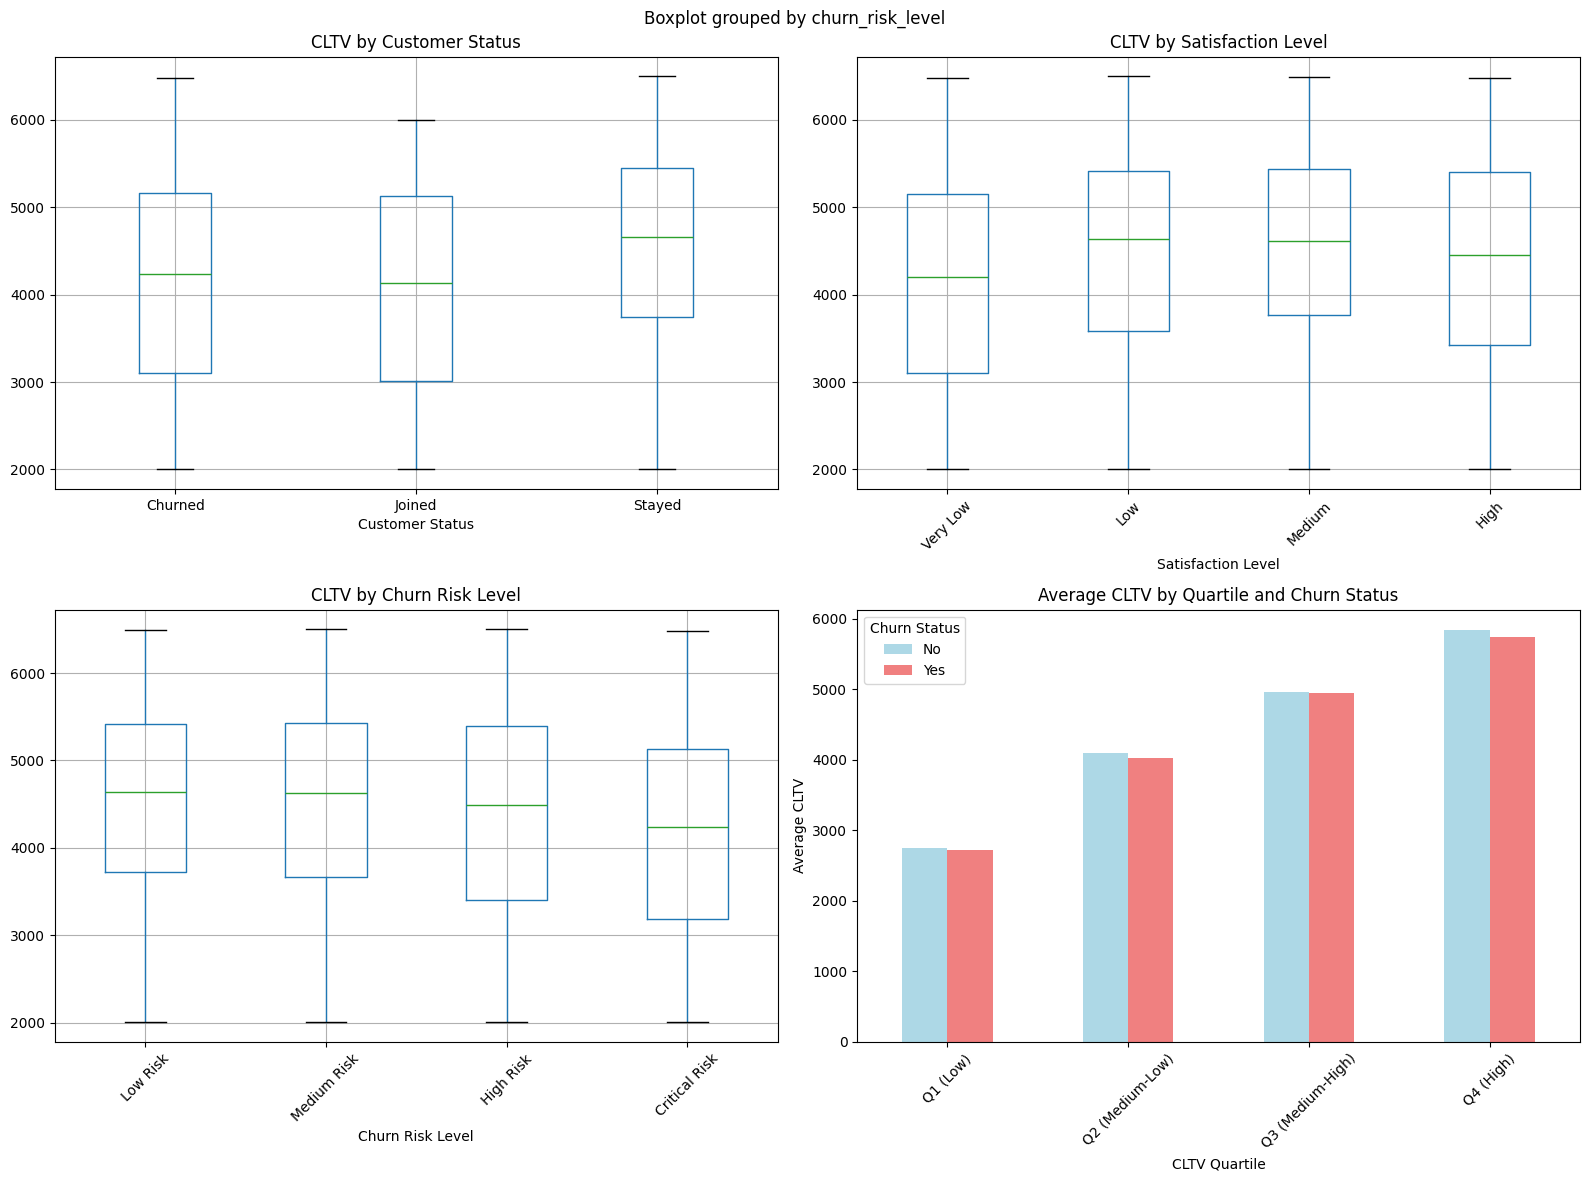

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('CLTV Analysis Across Different Segments', fontsize=16, fontweight='bold')


# CLTV by Customer Status
df_feature.boxplot(column='cltv', by='customer_status', ax=axes[0, 0])
axes[0, 0].set_title('CLTV by Customer Status')
axes[0, 0].set_xlabel('Customer Status')


# CLTV by Satisfaction Level
df_feature.boxplot(column='cltv', by='satisfaction_level', ax=axes[0, 1])
axes[0, 1].set_title('CLTV by Satisfaction Level')
axes[0, 1].set_xlabel('Satisfaction Level')
axes[0, 1].tick_params(axis='x', rotation=45)


# CLTV by Churn Risk Level
df_feature.boxplot(column='cltv', by='churn_risk_level', ax=axes[1, 0])
axes[1, 0].set_title('CLTV by Churn Risk Level')
axes[1, 0].set_xlabel('Churn Risk Level')
axes[1, 0].tick_params(axis='x', rotation=45)


# Average CLTV by Quartile and Churn Status
cltv_churn = df_feature.groupby(['cltv_quartile', 'churn_label'])['cltv'].mean().unstack()
cltv_churn.plot(kind='bar', ax=axes[1, 1], color=['lightblue', 'lightcoral'])
axes[1, 1].set_title('Average CLTV by Quartile and Churn Status')
axes[1, 1].set_xlabel('CLTV Quartile')
axes[1, 1].set_ylabel('Average CLTV')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].legend(title='Churn Status')


plt.tight_layout()
plt.show()

CLTV insights

In [ ]:
cltv_by_status = df_feature.groupby('customer_status')['cltv'].agg(['mean', 'median', 'std'])
print("CLTV by Customer Status:")
cltv_by_status.round(2)

CLTV by Customer Status:


,mean,median,std
customer_status,,,
Churned,4149.41,4238.0,1189.37
Joined,4082.67,4132.0,1188.06
Stayed,4530.19,4666.0,1158.29


In [ ]:
print(f"\nCLTV by Satisfaction Level:")
cltv_by_satisfaction = df_feature.groupby('satisfaction_level')['cltv'].agg(['mean', 'median', 'std'])
cltv_by_satisfaction.round(2)


CLTV by Satisfaction Level:


,mean,median,std
satisfaction_level,,,
Very Low,4138.86,4207.0,1186.69
Low,4473.40,4634.0,1173.26
Medium,4514.32,4615.0,1149.15
High,4380.84,4458.0,1204.35


## Analisis Advanced: Churn Probability dan Risk Profiling

Churn probability by different factors

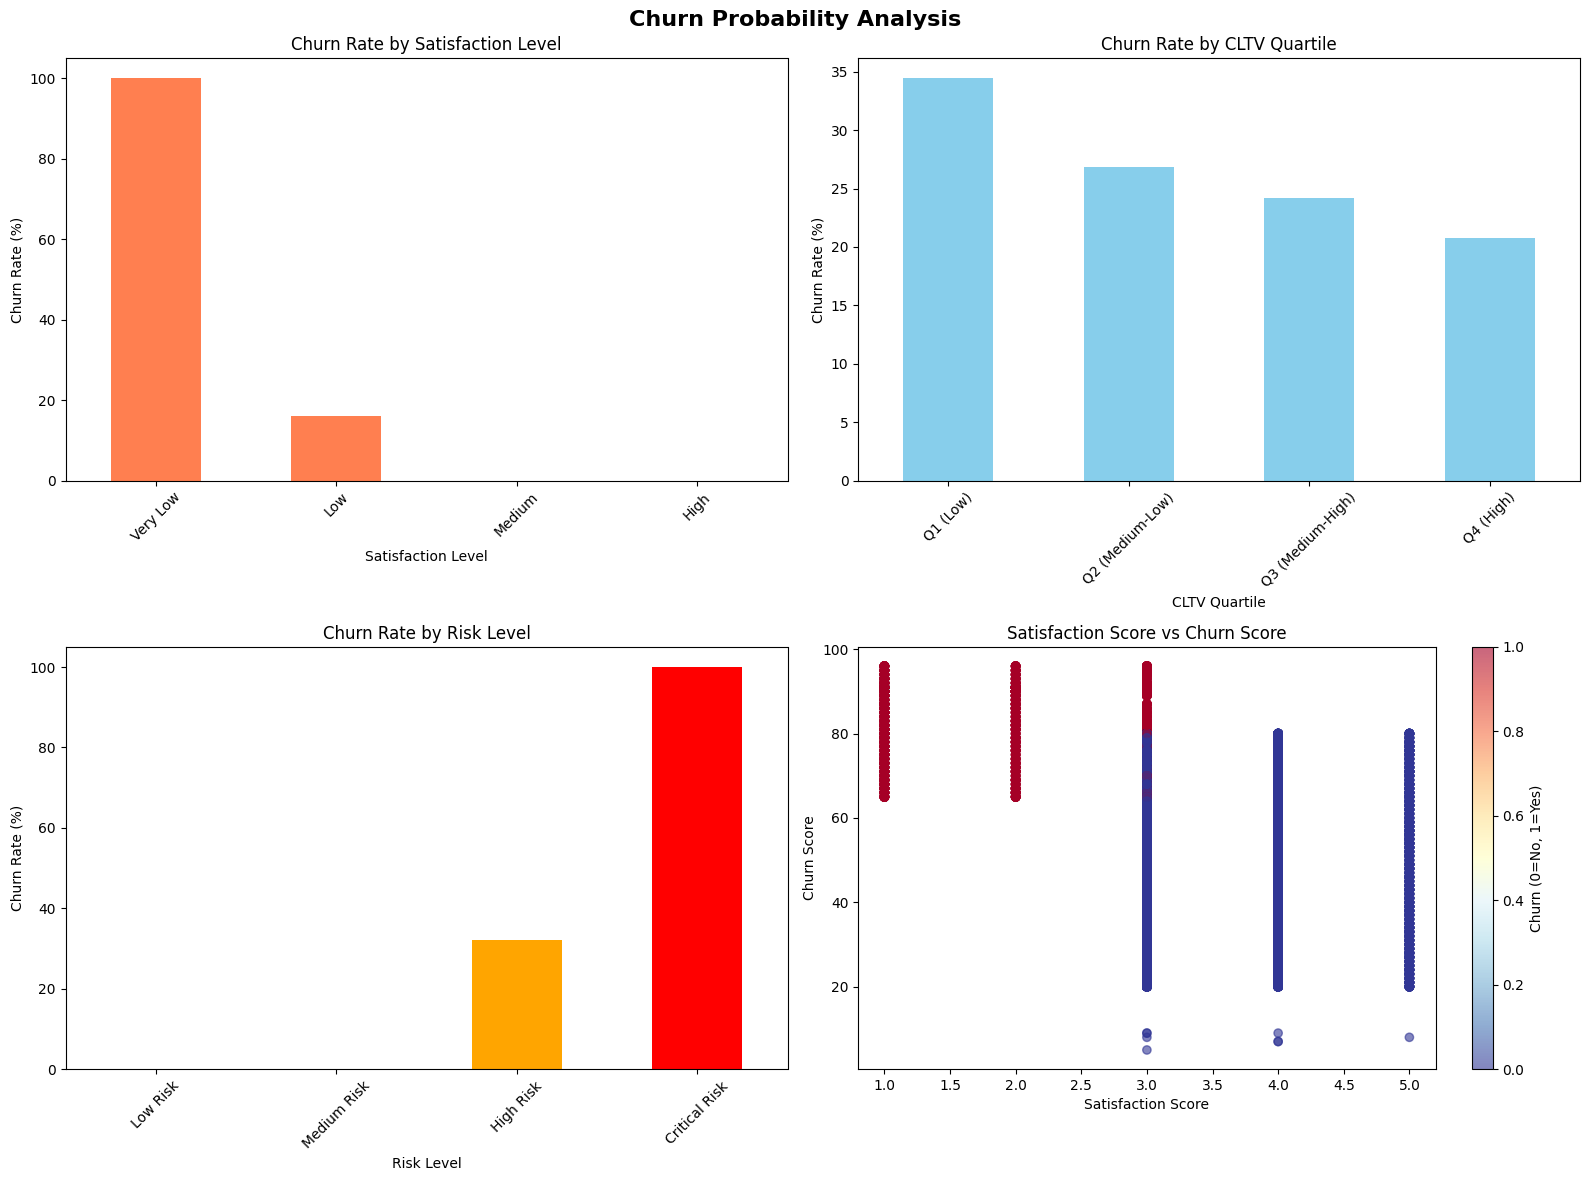

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Churn Probability Analysis', fontsize=16, fontweight='bold')

# Churn rate by satisfaction level
churn_by_satisfaction = df_feature.groupby('satisfaction_level')['churn_value'].agg(['count', 'sum']).round(2)
churn_by_satisfaction['churn_rate'] = (churn_by_satisfaction['sum'] / churn_by_satisfaction['count'] * 100).round(2)
churn_by_satisfaction['churn_rate'].plot(kind='bar', ax=axes[0, 0], color='coral')
axes[0, 0].set_title('Churn Rate by Satisfaction Level')
axes[0, 0].set_xlabel('Satisfaction Level')
axes[0, 0].set_ylabel('Churn Rate (%)')
axes[0, 0].tick_params(axis='x', rotation=45)

# Churn rate by CLTV quartile
churn_by_cltv = df_feature.groupby('cltv_quartile')['churn_value'].agg(['count', 'sum']).round(2)
churn_by_cltv['churn_rate'] = (churn_by_cltv['sum'] / churn_by_cltv['count'] * 100).round(2)
churn_by_cltv['churn_rate'].plot(kind='bar', ax=axes[0, 1], color='skyblue')
axes[0, 1].set_title('Churn Rate by CLTV Quartile')
axes[0, 1].set_xlabel('CLTV Quartile')
axes[0, 1].set_ylabel('Churn Rate (%)')
axes[0, 1].tick_params(axis='x', rotation=45)

# Churn rate by risk level
churn_by_risk = df_feature.groupby('churn_risk_level')['churn_value'].agg(['count', 'sum']).round(2)
churn_by_risk['churn_rate'] = (churn_by_risk['sum'] / churn_by_risk['count'] * 100).round(2)
churn_by_risk['churn_rate'].plot(kind='bar', ax=axes[1, 0],
                                color=['green', 'yellow', 'orange', 'red'])
axes[1, 0].set_title('Churn Rate by Risk Level')
axes[1, 0].set_xlabel('Risk Level')
axes[1, 0].set_ylabel('Churn Rate (%)')
axes[1, 0].tick_params(axis='x', rotation=45)

# Satisfaction vs Churn Score scatter
scatter = axes[1, 1].scatter(df_feature['satisfaction_score'], df_feature['churn_score'],
                           c=df_feature['churn_value'], cmap='RdYlBu_r', alpha=0.6)
axes[1, 1].set_title('Satisfaction Score vs Churn Score')
axes[1, 1].set_xlabel('Satisfaction Score')
axes[1, 1].set_ylabel('Churn Score')
plt.colorbar(scatter, ax=axes[1, 1], label='Churn (0=No, 1=Yes)')

plt.tight_layout()
plt.show()

In [ ]:
print("Churn Rate by Satisfaction Level:")
churn_by_satisfaction[['count', 'churn_rate']]

Churn Rate by Satisfaction Level:


,count,churn_rate
satisfaction_level,,
Very Low,1440,100.0
Low,2665,16.1
Medium,1789,0.0
High,1149,0.0


In [ ]:
print("\nChurn Rate by CLTV Quartile:")
churn_by_cltv[['count', 'churn_rate']]


Churn Rate by CLTV Quartile:


,count,churn_rate
cltv_quartile,,
Q1 (Low),1763,34.43
Q2 (Medium-Low),1759,26.83
Q3 (Medium-High),1760,24.15
Q4 (High),1761,20.73


In [ ]:
print("\nChurn Rate by Risk Level:")
churn_by_risk[['count', 'churn_rate']]


Churn Rate by Risk Level:


,count,churn_rate
churn_risk_level,,
Low Risk,953,0.00
Medium Risk,2523,0.00
High Risk,2503,32.16
Critical Risk,1064,100.00


# Key Insights dan Rekomendasi

In [ ]:
# Calculate key metrics untuk insights
total_customers = len(df_feature)
churned_customers = len(df_feature[df_feature['churn_value'] == 1])
churn_rate = (churned_customers / total_customers) * 100

low_satisfaction = len(df_feature[df_feature['satisfaction_score'] <= 2])
high_risk_customers = len(df_feature[df_feature['churn_score'] >= 80])
high_value_churned = len(df_feature[(df_feature['churn_value'] == 1) & (df_feature['cltv_quartile'] == 'Q4 (High)')])

In [ ]:
print(f"""
OVERVIEW METRICS:
   • Total Pelanggan: {total_customers:,}
   • Pelanggan yang Churn: {churned_customers:,}
   • Churn Rate: {churn_rate:.2f}%
   • Pelanggan dengan Kepuasan Rendah: {low_satisfaction:,}
   • Pelanggan High Risk: {high_risk_customers:,}

KEY FINDINGS:
   1. Satisfaction Score memiliki korelasi kuat dengan churn behavior
   2. Pelanggan dengan CLTV tinggi yang churn menyebabkan kerugian signifikan
   3. Churn score akurat dalam memprediksi probabilitas churn
   4. Alasan utama churn perlu dianalisis untuk strategi retensi
   5. Pelanggan baru (Joined) memiliki pola behavior yang berbeda

REKOMENDASI STRATEGIS:
   1. IMMEDIATE ACTIONS:
      • Identifikasi dan intervensi pada {high_risk_customers:,} pelanggan high-risk
      • Program retensi khusus untuk high-value customers di Q4 CLTV
      • Survey mendalam untuk pelanggan dengan satisfaction score ≤ 2

   2. MEDIUM TERM:
      • Implementasi early warning system berdasarkan churn score
      • Personalisasi experience berdasarkan satisfaction level
      • Program loyalty untuk meningkatkan CLTV

   3. LONG TERM:
      • Predictive analytics untuk proactive churn prevention
      • Customer success program berbasis data insights
      • Continuous monitoring dan optimization

EXPECTED IMPACT:
   • Potensi pengurangan churn rate hingga 15-25%
   • Peningkatan customer satisfaction score rata-rata
   • Optimalisasi customer lifetime value
""")



OVERVIEW METRICS:
   • Total Pelanggan: 7,043
   • Pelanggan yang Churn: 1,869
   • Churn Rate: 26.54%
   • Pelanggan dengan Kepuasan Rendah: 1,440
   • Pelanggan High Risk: 1,214

KEY FINDINGS:
   1. Satisfaction Score memiliki korelasi kuat dengan churn behavior
   2. Pelanggan dengan CLTV tinggi yang churn menyebabkan kerugian signifikan
   3. Churn score akurat dalam memprediksi probabilitas churn
   4. Alasan utama churn perlu dianalisis untuk strategi retensi
   5. Pelanggan baru (Joined) memiliki pola behavior yang berbeda

REKOMENDASI STRATEGIS:
   1. IMMEDIATE ACTIONS:
      • Identifikasi dan intervensi pada 1,214 pelanggan high-risk
      • Program retensi khusus untuk high-value customers di Q4 CLTV
      • Survey mendalam untuk pelanggan dengan satisfaction score ≤ 2

   2. MEDIUM TERM:
      • Implementasi early warning system berdasarkan churn score
      • Personalisasi experience berdasarkan satisfaction level
      • Program loyalty untuk meningkatkan CLTV

   3. LON

# Save

In [ ]:
df_feature.to_csv('fix.csv', index=False)